# Slippage Analysis

When evaluating a strategy using backtest results, we often want to know how sensitive it's performance is to implementation shortfall or slippage. pyfolio's transactions tear sheet can create "slippage sweep" plots that display strategy performance under various slippage assumptions. 

Additional per-dollar slippage can be applied to returns before running a tear sheet by providing `create_full_tearsheet` with the a level of slippage in basis points (1% == 100 basis points) as the `slippage` keyword argument. The slippage plots in the transactions tear sheet will display returns with slippage added to the **unadjusted** returns. 

For example, if you run a backtest with no transaction costs and call `create_full_tearsheet(returns, positions, transactions, slippage=5)`, 5 bps of slippage will be applied to `returns` before all plots and figures, with the exception of the slippage sweep plots, are generated.

It is important to emphasize that the slippage plots will display performance under **additional** slippage. If the passed performance data already has slippage applied, the 5 bps slippage equity curve will represent performance under 5 bps of slippage in addition to the already simulated slippage penalty. If slippage is already applied to the performance results, pass `slippage=0` to the `create_full_tearsheet` to trigger the creation of the additional slippage sweep plots without applying any additional slippage to the returns time series used throughout the rest of the tear sheet.

In [1]:
%matplotlib inline
import pyfolio as pf
import gzip
import pandas as pd

In [5]:
transactions = pd.read_csv(gzip.open('../tests/test_data/test_txn.csv.gz'),
                    index_col=0, parse_dates=0)
positions = pd.read_csv(gzip.open('../tests/test_data/test_pos.csv.gz'),
                    index_col=0, parse_dates=0)
returns = pd.read_csv(gzip.open('../tests/test_data/test_returns.csv.gz'),
                    index_col=0, parse_dates=0, header=None)[1]
gross_lev = pd.read_csv(gzip.open('../tests/test_data/test_gross_lev.csv.gz'),
                    index_col=0, parse_dates=0, header=None)[1]
returns.index = returns.index.tz_localize("UTC")
positions.index = positions.index.tz_localize("UTC")
transactions.index = transactions.index.tz_localize("UTC")
gross_lev.index = gross_lev.index.tz_localize("UTC")

Entire data start date: 2004-01-09
Entire data end date: 2009-12-31


Backtest Months: 71
                   Backtest
annual_return          0.12
annual_volatility      0.26
sharpe_ratio           0.45
calmar_ratio           0.20
stability              0.00
max_drawdown          -0.60
omega_ratio            1.09
sortino_ratio          0.66
skewness               0.14
kurtosis               5.88
information_ratio      0.03
alpha                  0.08
beta                   0.83

Worst Drawdown Periods
   net drawdown in %  peak date valley date recovery date duration
0              60.39 2007-11-06  2009-03-09           NaT      NaN
1              24.10 2005-07-28  2006-09-07    2007-05-22      474
4              11.89 2004-06-25  2004-08-12    2004-11-05       96
2              10.87 2004-11-15  2005-04-18    2005-07-14      174
3               9.51 2007-07-16  2007-08-06    2007-09-13       44


2-sigma returns daily    -0.033
2-sigma returns weekly   -0.068
dtype: float64


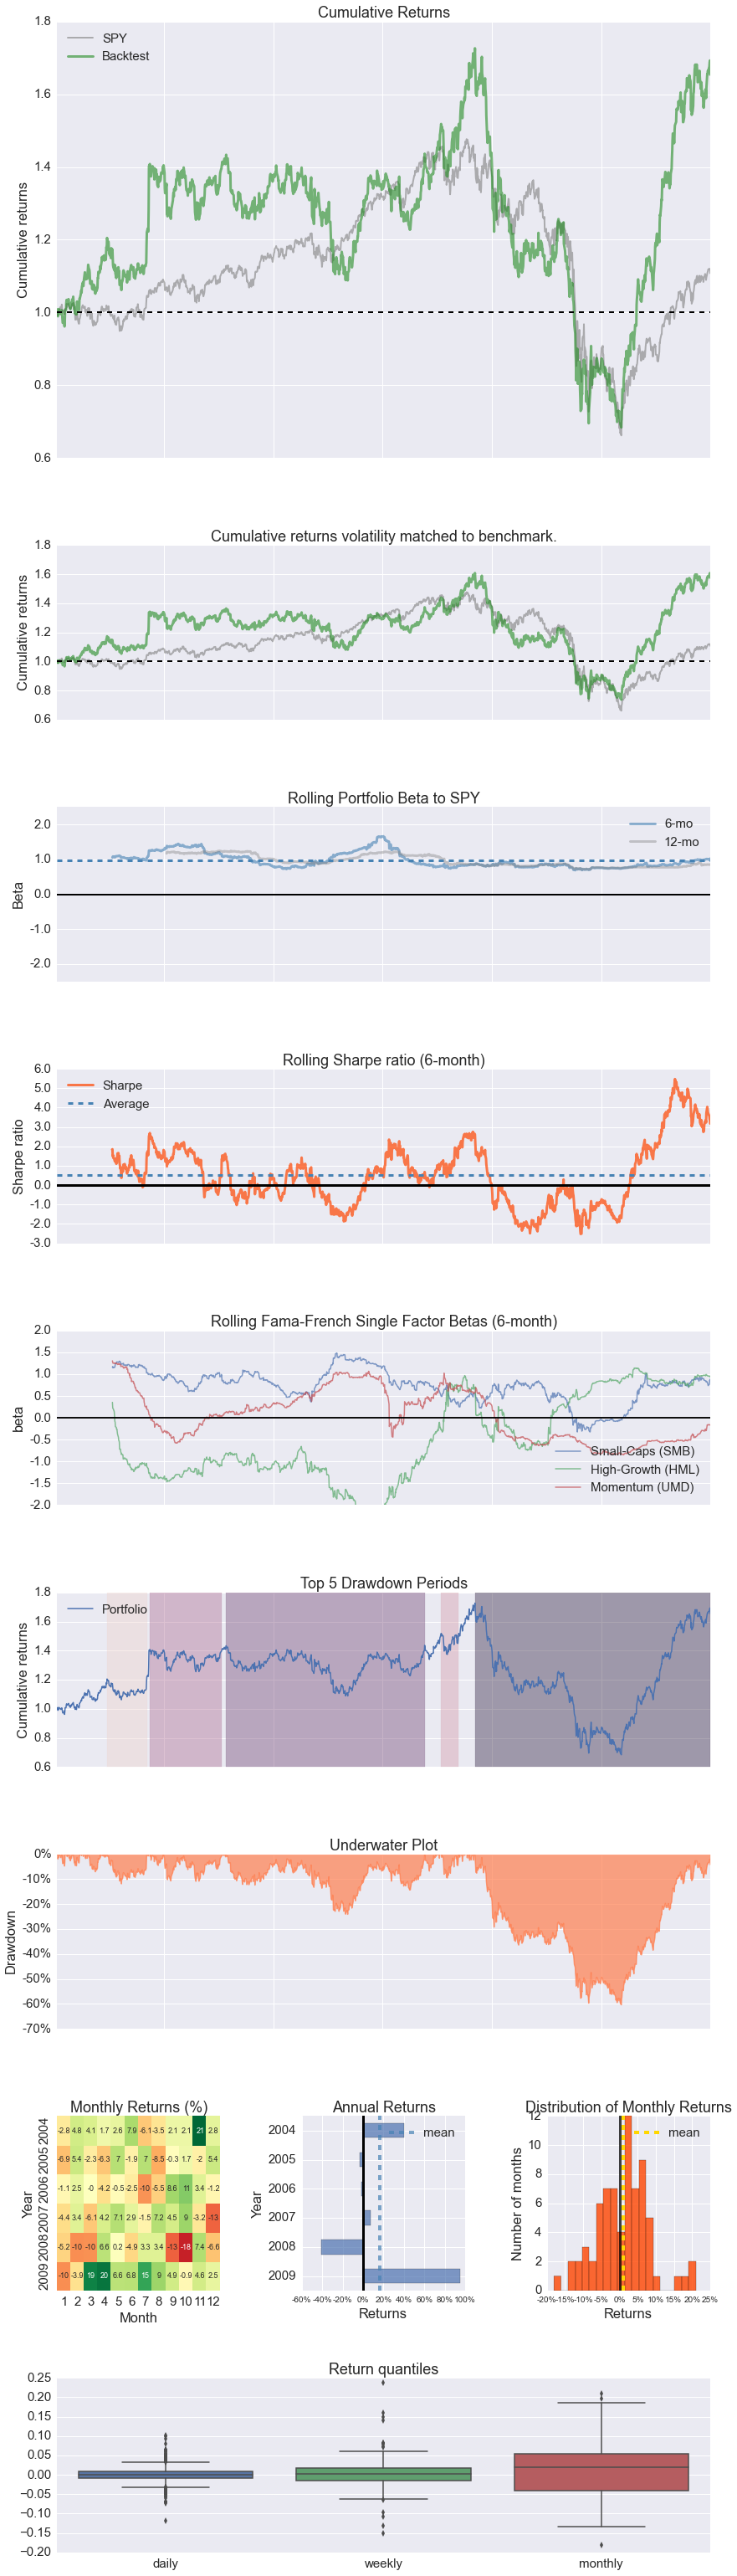


Stress Events
                             mean    min    max
Lehmann                    -0.003 -0.047  0.041
Aug07                       0.003 -0.030  0.029
Mar08                      -0.004 -0.033  0.034
Sept08                     -0.007 -0.044  0.041
2009Q1                     -0.004 -0.050  0.034
2009Q2                      0.007 -0.040  0.061
Low Volatility Bull Market  0.000 -0.061  0.064
GFC Crash                  -0.001 -0.118  0.101
Recovery                    0.004 -0.040  0.060


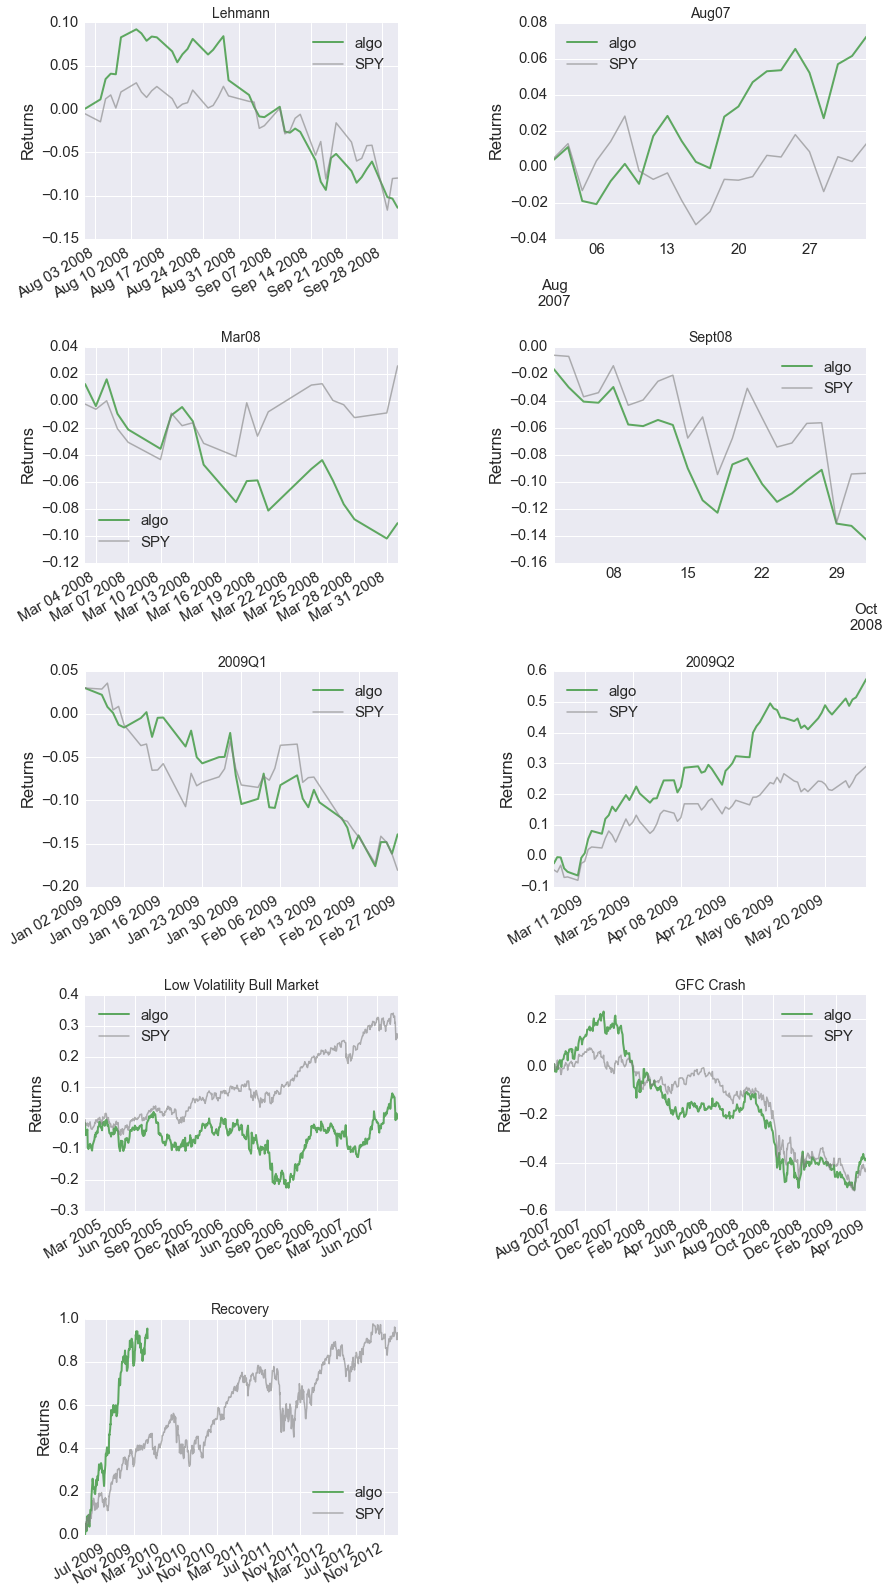



Top 10 long positions of all time (and max%)
['COST' 'DELL' 'CERN' 'MMM' 'INTC' 'AMD' 'GPS']
[ 0.9    0.857  0.835  0.821  0.786  0.758  0.622]


Top 10 short positions of all time (and max%)
['AMD' 'DELL' 'CERN' 'MMM' 'GPS' 'INTC' 'COST']
[-0.301 -0.266 -0.255 -0.226 -0.201 -0.185 -0.164]


Top 10 positions of all time (and max%)
['COST' 'DELL' 'CERN' 'MMM' 'INTC' 'AMD' 'GPS']
[ 0.9    0.857  0.835  0.821  0.786  0.758  0.622]


All positions ever held
['COST' 'DELL' 'CERN' 'MMM' 'INTC' 'AMD' 'GPS']
[ 0.9    0.857  0.835  0.821  0.786  0.758  0.622]




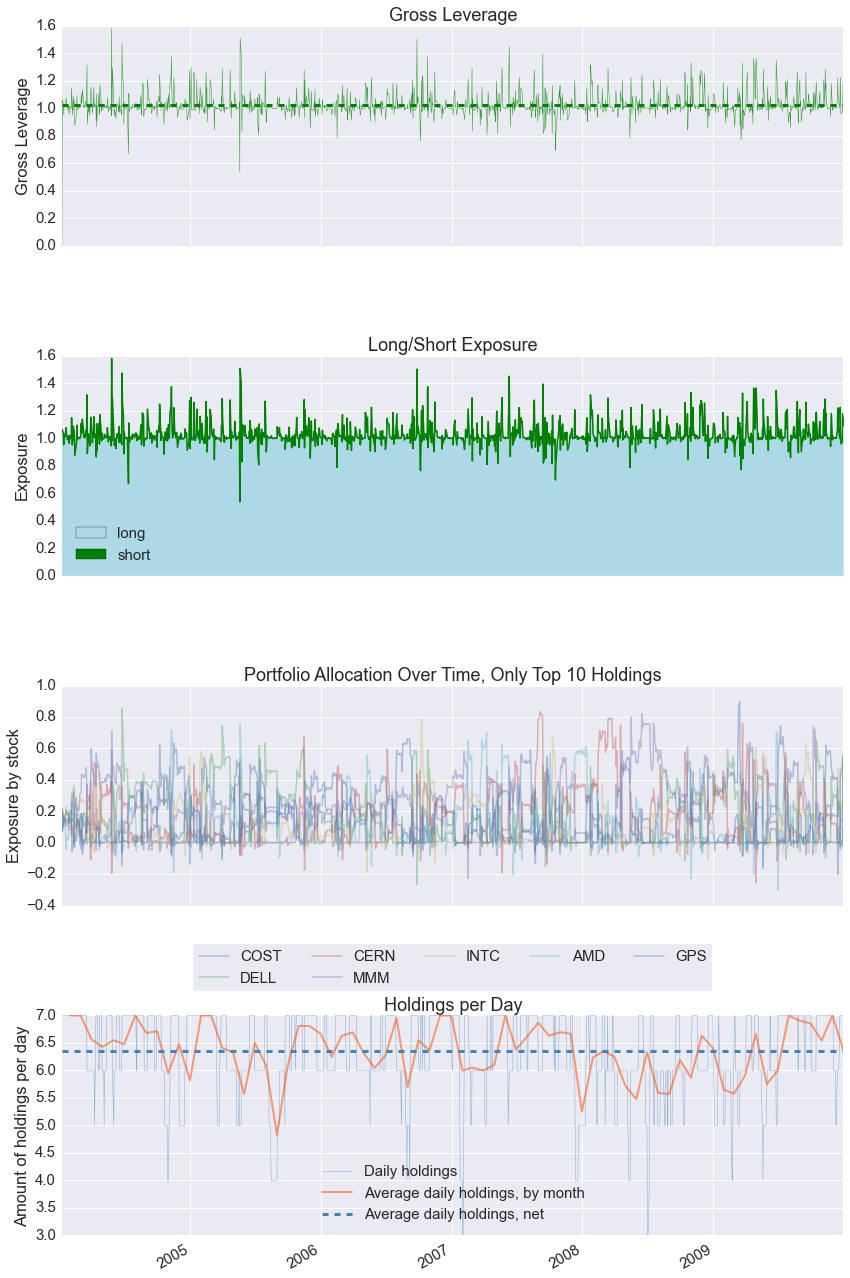

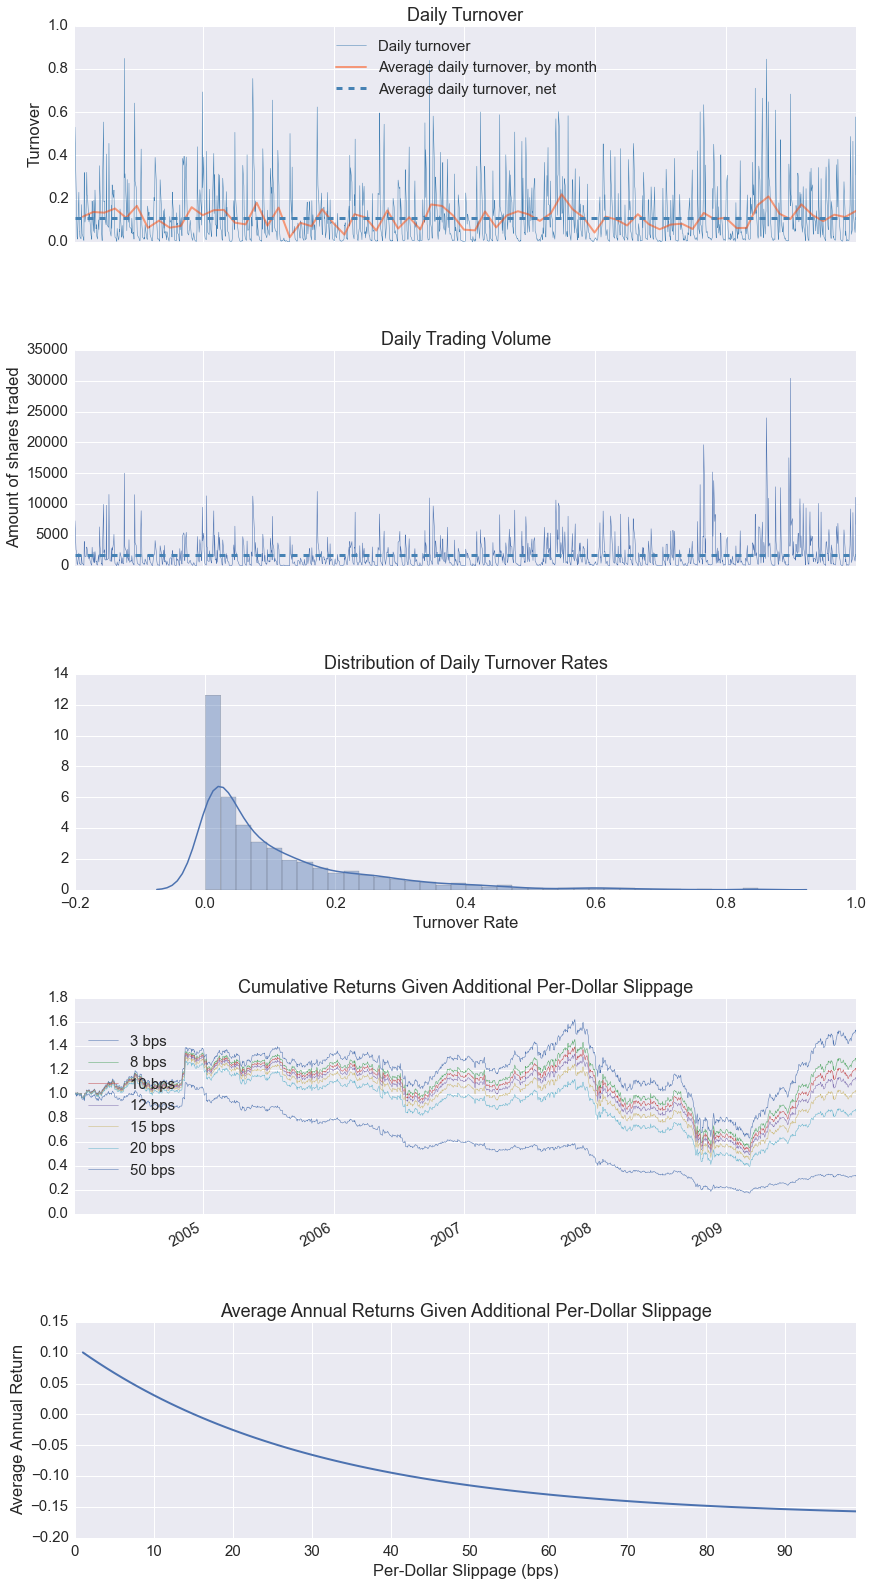

In [7]:
pf.create_full_tear_sheet(returns, positions, transactions, gross_lev=gross_lev, slippage=0)